# **Annealing With D-Wave Systems**

## **Import Libraries and Find Eingenvalues and Eigenstaties**

In [1]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

X = np.array([[0, 1], [1, 0]])
IX = np.kron(np.eye(2), X)
XI = np.kron(X, np.eye(2))
H_0 = - (IX + XI)
λ, v = np.linalg.eigh(H_0)
print("Eigenvalues:", λ)
print("Eigenstate for lowest eigenvalue", v[:, 0])

Eigenvalues: [-2. -0.  0.  2.]
Eigenstate for lowest eigenvalue [0.5 0.5 0.5 0.5]


## **A classical solver for the Ising model is the simulated annealer:**

In [3]:
pip install dimod

     |████████████████████████████████| 14.5 MB 55 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import dimod

J = {(0, 1): 1.0, (1, 2): -1.0}
h = {0:0, 1:0, 2:0}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)
print("Energy of samples:")
print([solution.energy for solution in response.data()])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Energy of samples:
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]


**The Chimera graph is available as a `networkx` graph in the package `dwave_networkx`. We try out few versions consisting of $2\times 2$ and $4\times 4$ unit cells.**

In [6]:
pip install dwave_networkx

     |████████████████████████████████| 97 kB 56 kB/s s eta 0:00:01
     |████████████████████████████████| 981 kB 18.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


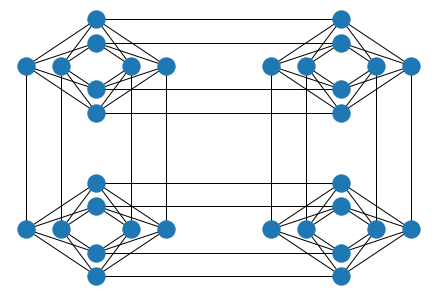

In [7]:
import matplotlib.pyplot as plt
import dwave_networkx as dnx
%matplotlib inline

connectivity_structure = dnx.chimera_graph(2, 2)
dnx.draw_chimera(connectivity_structure)
plt.show()

## **A complete graph $K_n$ on nine nodes:**

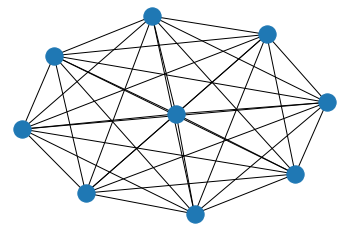

In [8]:
import networkx as nx
G = nx.complete_graph(9)
plt.axis('off') 
nx.draw_networkx(G, with_labels=False)

In [10]:
pip install minorminer

     |████████████████████████████████| 5.2 MB 83 kB/s s eta 0:00:01
     |████████████████████████████████| 282 kB 72.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import minorminer
embedded_graph = minorminer.find_embedding(G.edges(), connectivity_structure.edges())

## **Plot this embedding:**

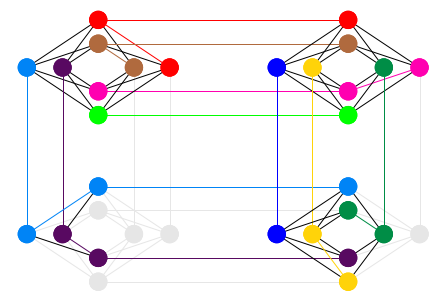

In [12]:
dnx.draw_chimera_embedding(connectivity_structure, embedded_graph)
plt.show()

## **Find the maximum chain length:**

In [13]:
max_chain_length = 0
for _, chain in embedded_graph.items():
    if len(chain) > max_chain_length:
        max_chain_length = len(chain)
print(max_chain_length)

4


The chain on the hardware is implemented by having strong couplings between the elements in a chain, twice as strong as what the user can set. However, long chains can break, giving inconsistent results. In general,  shorter chains are preferred, that not physical qubits are not wasted and more reliable results are obtained.

# **References**

[1] M. Fingerhuth, T. Babej, P. Wittek. (2018). [Open source software in quantum computing](https://doi.org/10.1371/journal.pone.0208561). *PLOS ONE* 13(12):e0208561.  <a id='1'></a>